<a href="https://colab.research.google.com/github/NDsasuke/Decision-Trees/blob/main/DecisionTree_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.3.4-cp310-cp310-linux_x86_64.whl size=11773041 sha256=8f5bc9f54083a3e085ba3eb2491d3ba22ac8b8d1e4d4b97ed98f194376b1c5cc
  Stored in directory: /root/.cache/pip/wheels/38/c6/49/eaba6d234887d98d9c85185e2a90bd7bb77934e85eefaf317e
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.8.1 requires matplotlib>=3.5.0, but you have matplotlib 3.3.4 which is incompatible.
plotnine 0.10.1 requires matplot

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from IPython.display import display

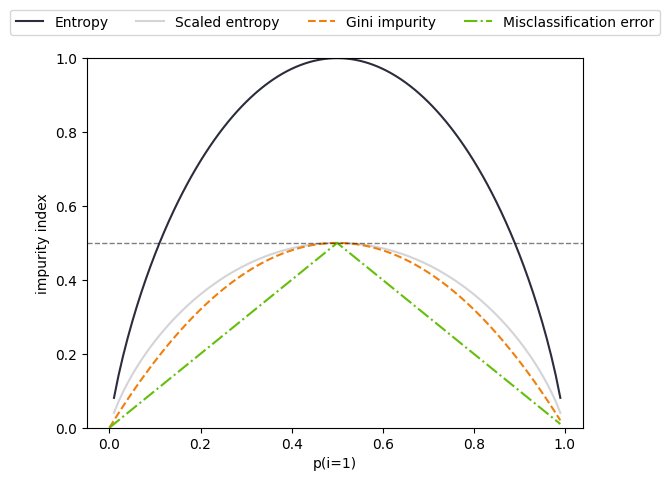

In [57]:
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def gini(p):
    return 1 - (p**2 + (1 - p)**2)

def error(p):
    return 1 - np.max([p, 1 - p], axis=0)

x = np.arange(0, 1, 0.01)
entropy = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in entropy]

ax = plt.subplot(111)
for y, lab, ls, c in zip([entropy, sc_ent, gini(x), error(x)],
                                ['Entropy', 'Scaled entropy', 'Gini impurity', 'Misclassification error'],
                                ['-','-', '--', '-.'],
                                ['#2b2c3c', '#d4d4d8', '#ef800e', '#64bf0b']):
    line = ax.plot(x, y, label=lab, linestyle=ls, color=c)
ax.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15))
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--', alpha=0.5)
plt.ylim([0, 1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
plt.show()

In [58]:
"""Example: identify the candidate thresholds for a continuous valued attribute"""

columns = ('Hair color', 'Height', 'Target')
data = [('Platinum', 190, True),('Dark', 191, True),('Brown', 159, True),('Dark', 177, False),
        ('Dark', 174, False),('Blonde', 186, False),('Blonde', 150, True)]
data = pd.DataFrame.from_records(data, columns=columns)

# sort according to height
data.sort_values('Height', ascending=True, inplace=True)
data = data.reset_index(drop=True)

thresholds = []
for i in range(len(data)-1):
    if (data.at[i,'Target'] != data.at[i+1,'Target']):
        thresholds.append((data.at[i,'Height']+data.at[i+1,'Height'])/2)

display(data)
print('Candidate thresholds:', thresholds)

,Hair color,Height,Target
0,Blonde,150,True
1,Brown,159,True
2,Dark,174,False
3,Dark,177,False
4,Blonde,186,False
5,Platinum,190,True
6,Dark,191,True


Candidate thresholds: [166.5, 188.0]


In [59]:
# Read the data
data = np.asarray(pd.read_csv('decision_tree_data.csv', header=None))
print(data)

[[0.24539  0.81725  0.      ]
 [0.21774  0.76462  0.      ]
 [0.20161  0.69737  0.      ]
 [0.20161  0.58041  0.      ]
 [0.2477   0.49561  0.      ]
 [0.32834  0.44883  0.      ]
 [0.39516  0.48099  0.      ]
 [0.39286  0.57164  0.      ]
 [0.33525  0.62135  0.      ]
 [0.33986  0.71199  0.      ]
 [0.34447  0.81433  0.      ]
 [0.28226  0.82602  0.      ]
 [0.26613  0.75     0.      ]
 [0.26613  0.63596  0.      ]
 [0.32604  0.54825  0.      ]
 [0.28917  0.65643  0.      ]
 [0.80069  0.71491  0.      ]
 [0.80069  0.64181  0.      ]
 [0.80069  0.50146  0.      ]
 [0.79839  0.36988  0.      ]
 [0.73157  0.25     0.      ]
 [0.63249  0.18275  0.      ]
 [0.60023  0.27047  0.      ]
 [0.66014  0.34649  0.      ]
 [0.70161  0.42251  0.      ]
 [0.70853  0.53947  0.      ]
 [0.71544  0.63304  0.      ]
 [0.74309  0.72076  0.      ]
 [0.75     0.63596  0.      ]
 [0.75     0.46345  0.      ]
 [0.72235  0.35526  0.      ]
 [0.66935  0.28509  0.      ]
 [0.20622  0.94298  1.      ]
 [0.26613 

Class labels: [0 1]
Labels counts in y: [32 64]
Labels counts in y_train: [22 45]
Labels counts in y_test: [10 19]
Accuracy score: 0.8966


TypeError: ignored

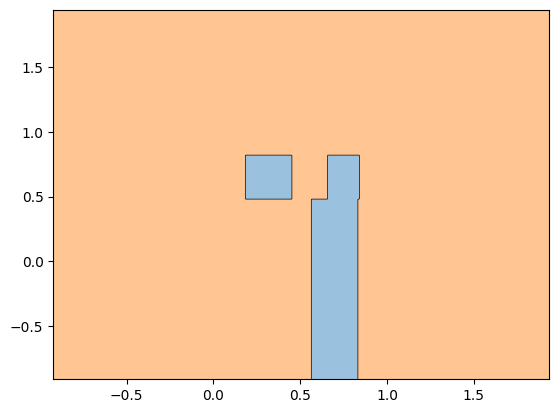

In [65]:
X = data[:,0:2]
y = data[:,2].astype(int)
# split data intro train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Class labels:', np.unique(y))
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))
# instantiate the classifier
tree_model = DecisionTreeClassifier(criterion='gini', 
                                    splitter='best', 
                                    max_depth=6, 
                                    min_samples_leaf=2,
                                    random_state=1)
# train the classifier
tree_model.fit(X_train,y_train)
# make predictions
y_pred = tree_model.predict(X_test)
# evaluate accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score: {:.4f}'.format(acc))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

# Plot the result
plot_decision_regions(X_combined, y_combined, clf=tree_model)



plt.title('Decision Tree Classifier')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

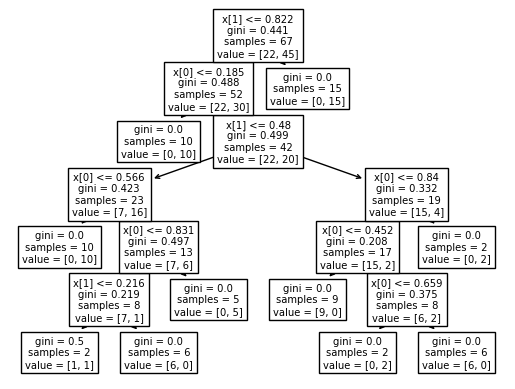

In [66]:
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()
